## Task

In this compulsory task you will clean the country column and parse the date column in the **store_income_data_task.csv** file.

In [1]:
# Load up store_income_data.csv
import pandas as pd
import numpy as np

df = pd.read_csv('store_income_data_task.csv')
df.head(5)

,id,store_name,store_email,department,income,date_measured,country
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,4-2-2006,United States/
1,2,Nordson Corporation,NaN,Tools,$41744177.01,4-1-2006,Britain
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,12-9-2003,United States
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,8-5-2006,Britain/
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,21-1-1973,United Kingdom


1. Take a look at all the unique values in the "country" column. Then, convert the column to lowercase and remove any trailing white spaces.

In [2]:
print(f'there are {df["country"].nunique()} countries')
countries = df['country'].unique()
print(countries)

there are 76 countries
['United States/' 'Britain' ' United States' 'Britain/' ' United Kingdom'
 'U.K.' 'SA ' 'U.K/' 'America' 'United Kingdom' nan 'united states'
 ' S.A.' 'England ' 'UK' 'S.A./' 'ENGLAND' 'BRITAIN' 'U.K' 'U.K '
 'America/' 'SA.' 'S.A. ' 'u.k' 'uk' ' ' 'UK.' 'England/' 'england'
 ' Britain' 'united states of america' 'UK/' 'SA/' 'SA' 'England.'
 'UNITED KINGDOM' 'America.' 'S.A..' 's.a.' ' U.K'
 ' United States of America' 'Britain ' 'England' ' SA'
 'United States of America.' 'United States of America/' 'United States.'
 's. africasouth africa' ' England' 'United Kingdom '
 'United States of America ' ' UK' 'united kingdom' 'AMERICA' 'America '
 'UNITED STATES OF AMERICA' ' S. AfricaSouth Africa' 'america'
 'S. AFRICASOUTH AFRICA' 'Britain.' '/' 'United Kingdom.' 'United States'
 ' America' 'UNITED STATES' 'sa' 'United States of America' 'UK '
 'United States ' 'S. AfricaSouth Africa/' 'S.A.' 'United Kingdom/'
 'S. AfricaSouth Africa ' 'S. AfricaSouth Africa.' 'S. 

In [3]:
df['country'] = df['country'].str.lower()
df['country'] = df['country'].str.strip()
print(f'there are {df["country"].nunique()} countries')
countries = df['country'].unique()
print(countries)
# type(countries)

there are 36 countries
['united states/' 'britain' 'united states' 'britain/' 'united kingdom'
 'u.k.' 'sa' 'u.k/' 'america' nan 's.a.' 'england' 'uk' 's.a./' 'u.k'
 'america/' 'sa.' '' 'uk.' 'england/' 'united states of america' 'uk/'
 'sa/' 'england.' 'america.' 's.a..' 'united states of america.'
 'united states of america/' 'united states.' 's. africasouth africa'
 'britain.' '/' 'united kingdom.' 's. africasouth africa/'
 'united kingdom/' 's. africasouth africa.' '.']


2. Note that there should only be three separate countries. Eliminate all variations, so that 'South Africa', 'United Kingdom' and 'United States' are the only three countries.

In [4]:
from fuzzywuzzy import fuzz, process

def find_and_replace_matches(df, column, string_to_match, min_ratio):
#     finding matches
    matches = process.extract(string_to_match, df[column], scorer=fuzz.token_sort_ratio)
    best_match = [match[0] for match in matches if match[1] >= min_ratio]
    
    # Replacing matches
    matching = df[column].isin(best_match)
    df.loc[matching, column] = string_to_match
    print(f'Successfully matched {string_to_match} in {column}')

In [5]:
correct_values = ['united states', 'united states or america', 'britain', 'uk', 'sa', 's.a', 'south africa', 'united kingdom']
for value in correct_values:
    find_and_replace_matches(df, 'country', value, 70)
# find_and_replace_matches(df, 'country','united states', 70)

Successfully matched united states in country
Successfully matched united states or america in country
Successfully matched britain in country
Successfully matched uk in country
Successfully matched sa in country
Successfully matched s.a in country
Successfully matched south africa in country
Successfully matched united kingdom in country


In [6]:
print(f'there are {df["country"].nunique()} countries')
countries = df['country'].unique()
print(countries)

there are 25 countries
['united states' 'britain' 'united kingdom' 'u.k.' 'sa' 'u.k/' 'america'
 nan 's.a' 'england' 'uk' 'u.k' 'america/' '' 'england/'
 'united states or america' 'uk/' 'england.' 'america.' 'south africa'
 'britain.' '/' 'united kingdom.' 'united kingdom/'
 's. africasouth africa.' '.']


In [7]:
df['country'].replace(['america', 'america.', 'united states of america', 'united states or america', 'america/'], value='united states', inplace=True)
df['country'].replace(['sa', 's.a.', 's.a', 's. africasouth africa', 's. africasouth africa.'], value='south africa', inplace=True)
df['country'].replace(['england', 'england.', 'england/','britain', 'britain.', 'u.k', 'u.k.', 'u.k/', 'uk', 'uk/', 'uk.', 'united kingdom/', 'united kingdom.'], value='united kingdom', inplace=True)
df['country'].replace(['.', '/', 'nan', ''], value=None, inplace=True)

In [8]:
df['country'].fillna('unknown', inplace=True)
filtered_country = df[df['country'] != 'unknown']
filtered_country['country'].unique()

array(['united states', 'united kingdom', 'south africa'], dtype=object)

3. Create a new column called `days_ago` in the DataFrame that is a copy of the 'date_measured' column but instead it is a number that shows how many days ago it was measured from the current date. Note that the current date can be obtained using `datetime.date.today()`.

In [9]:
from datetime import date, timedelta

In [10]:
df['date_measured'] = pd.to_datetime(df['date_measured'], format='%d-%m-%Y')
df['date_measured'].sample(5)


427   2004-03-17
135   2003-03-16
653   1994-05-23
290   2000-08-11
170   2005-10-12
Name: date_measured, dtype: datetime64[ns]

In [11]:
df['days_ago'] = pd.to_timedelta(date.today() - df['date_measured'].dt.date, unit='days')
df.head(5)

,id,store_name,store_email,department,income,date_measured,country,days_ago
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,2006-02-04,united states,6638 days
1,2,Nordson Corporation,NaN,Tools,$41744177.01,2006-01-04,united kingdom,6669 days
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,2003-09-12,united states,7514 days
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,2006-05-08,united kingdom,6545 days
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,1973-01-21,united kingdom,18705 days


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   id             1000 non-null   int64          
 1   store_name     1000 non-null   object         
 2   store_email    413 non-null    object         
 3   department     973 non-null    object         
 4   income         1000 non-null   object         
 5   date_measured  1000 non-null   datetime64[ns] 
 6   country        1000 non-null   object         
 7   days_ago       1000 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(5), timedelta64[ns](1)
memory usage: 62.6+ KB


In [13]:
df['income'] = df['income'].str.lstrip('$')
df['income'] = pd.to_numeric(df['income'])
df['income'] = round(df['income']/1000000, 4) #dividing the income by 1 million to reduce the range while changing its scale to income per million.
df.head(5)

,id,store_name,store_email,department,income,date_measured,country,days_ago
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,54.4386,2006-02-04,united states,6638 days
1,2,Nordson Corporation,NaN,Tools,41.7442,2006-01-04,united kingdom,6669 days
2,3,"Stag Industrial, Inc.",NaN,Beauty,36.1523,2003-09-12,united states,7514 days
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,8.9284,2006-05-08,united kingdom,6545 days
4,5,Mercantile Bank Corporation,NaN,Baby,33.5527,1973-01-21,united kingdom,18705 days


In [14]:
df.drop('store_email', axis=1, inplace=True)
df.sample(5)

,id,store_name,department,income,date_measured,country,days_ago
508,509,"Energizer Holdings, Inc.",Books,86.9430,1999-10-16,united kingdom,8941 days
312,313,Microchip Technology Incorporated,Shoes,58.6057,2001-04-11,united states,8398 days
196,197,"BancorpSouth, Inc.",Tools,74.9131,2002-10-18,south africa,7843 days
219,220,Oil-Dri Corporation Of America,Games,15.0556,2007-07-12,united kingdom,6115 days
129,130,Lions Gate Entertainment Corporation,Electronics,61.2213,2008-11-21,united states,5617 days


In [23]:
df.drop('id', axis=1, inplace=True)

In [15]:
df['department'].fillna('unknown', inplace=True)
print(df['department'].value_counts())
df.info()

department
Games          56
Baby           52
Health         50
Garden         50
Electronics    50
Shoes          49
Outdoors       48
Computers      47
Books          45
Kids           45
Tools          45
Movies         44
Clothing       44
Automotive     44
Jewelry        43
Toys           41
Home           41
Beauty         40
Industrial     39
Music          37
Grocery        36
unknown        27
Sports         27
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   id             1000 non-null   int64          
 1   store_name     1000 non-null   object         
 2   department     1000 non-null   object         
 3   income         1000 non-null   float64        
 4   date_measured  1000 non-null   datetime64[ns] 
 5   country        1000 non-null   object         
 6   days_ago       1000 non

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df_2010 = df[df['date_measured'].dt.year >= 2010]
df_2010.sample(5)

,store_name,department,income,date_measured,country,days_ago
313,Semtech Corporation,Health,53.8533,2010-08-09,unknown,4991 days
682,Hillenbrand Inc,Games,3.6588,2010-06-24,united kingdom,5037 days
422,SodaStream International Ltd.,Kids,92.3442,2011-07-26,united states,4640 days
488,Hallador Energy Company,Games,57.5194,2012-04-14,united kingdom,4377 days
627,"Recon Technology, Ltd.",Games,70.6084,2011-03-03,united kingdom,4785 days


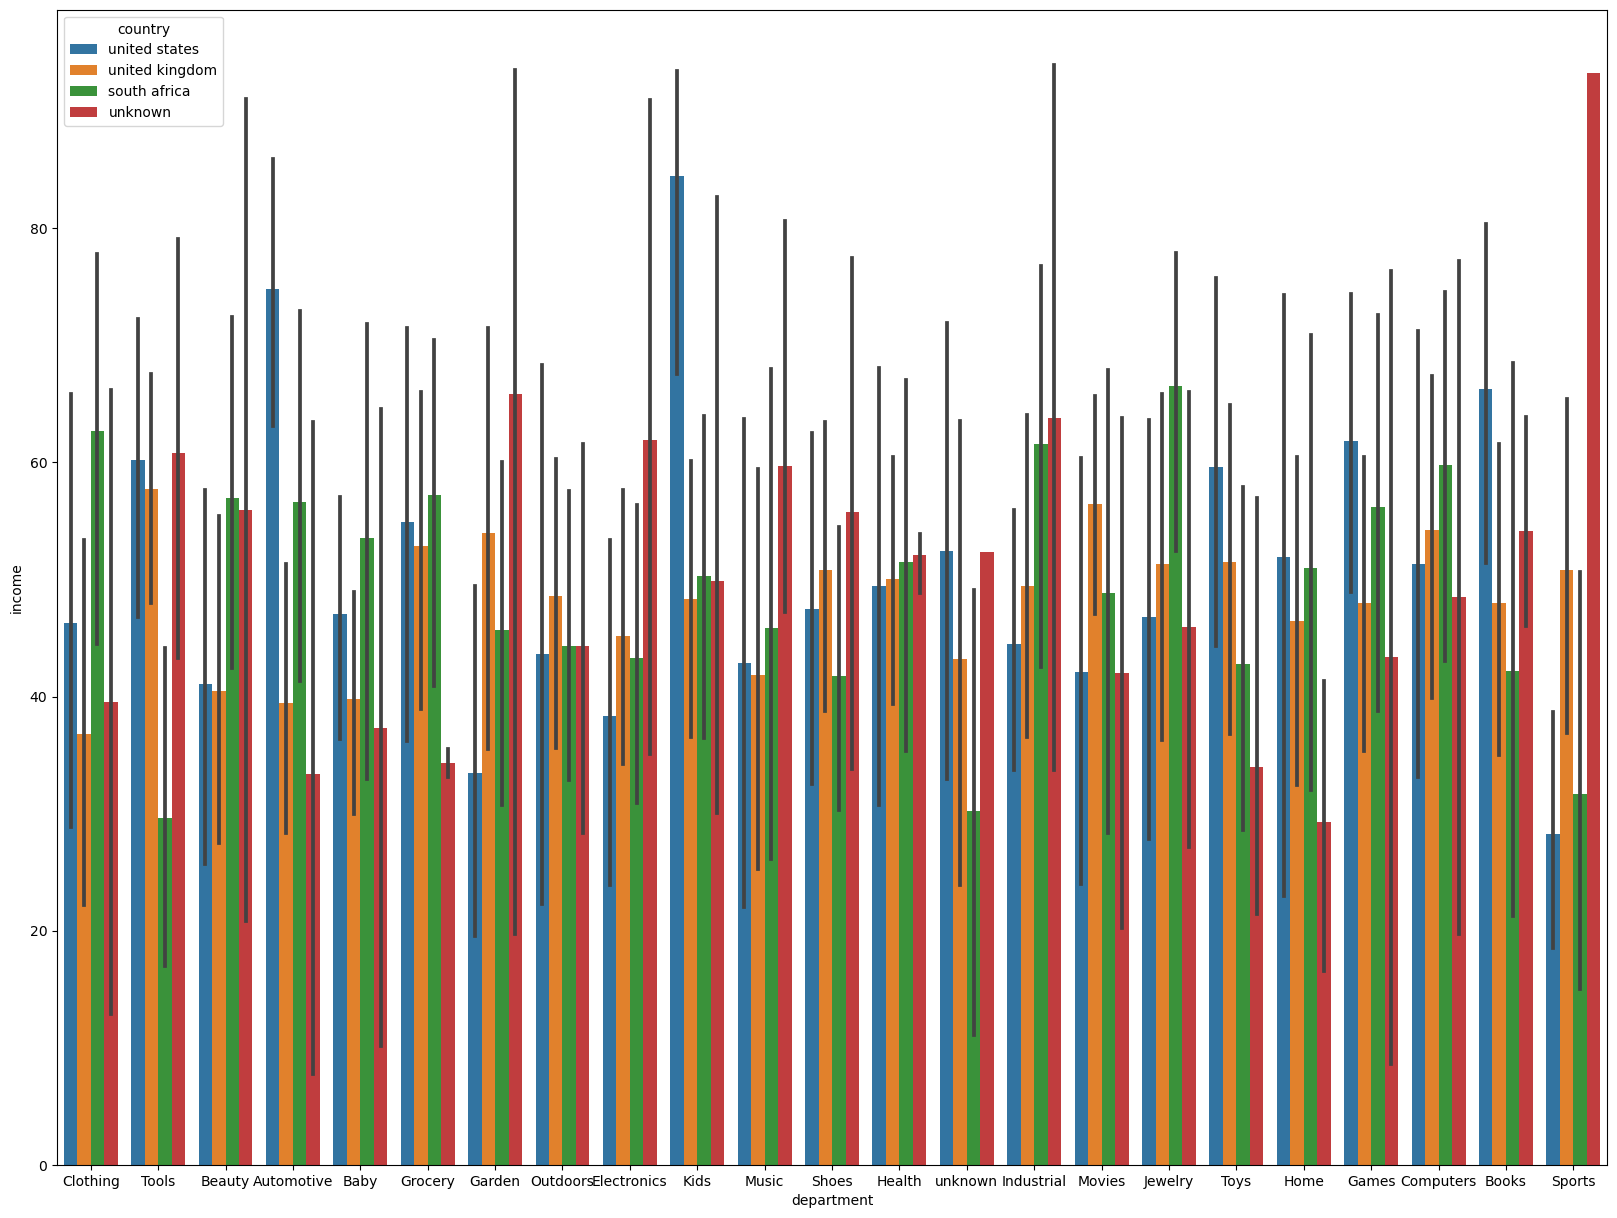

In [28]:
plt.figure(figsize=(20,15))
sns.barplot(df, x='department', y='income', hue='country')
plt.show()

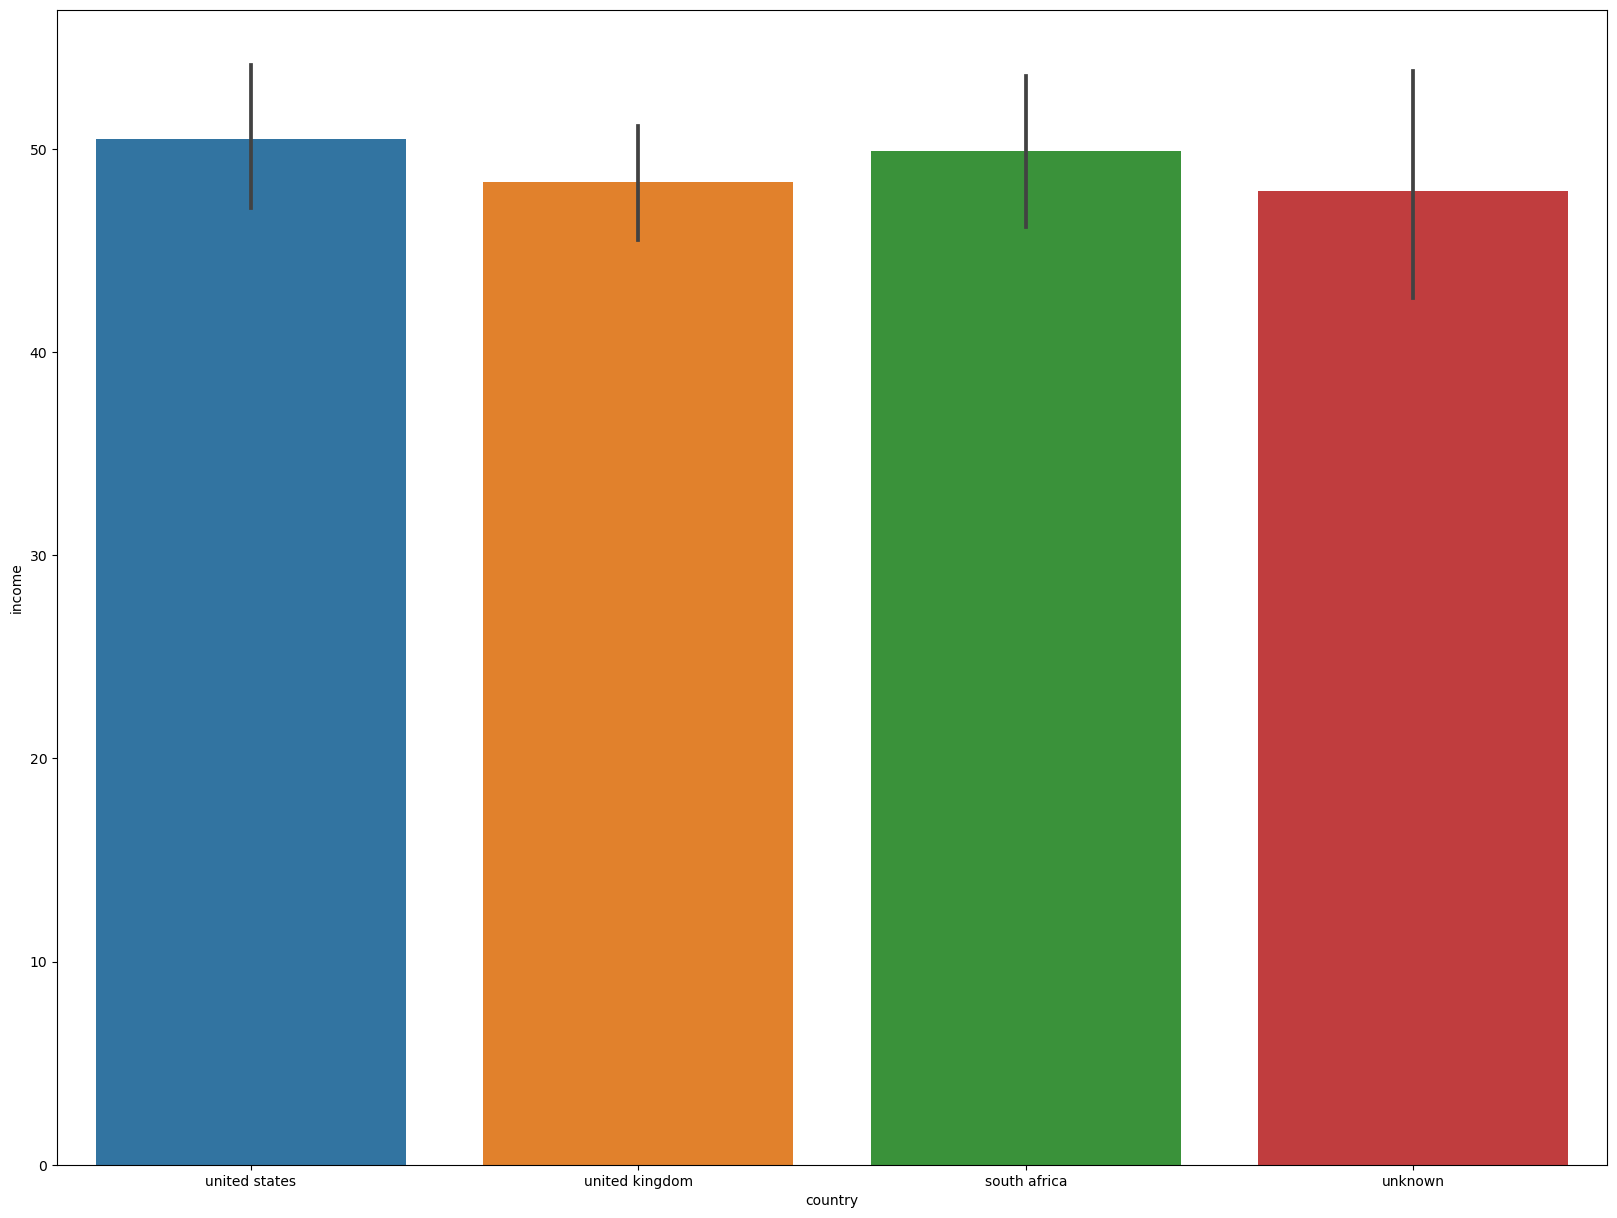

In [29]:
plt.figure(figsize=(20,15))
sns.barplot(df, x='country', y='income')
plt.show()

###### Insight:
1. It can be deduced that the United States have a slightly higher income within those year, the highest of which comes from the sales of kids items across all stores.
2. It can also be deduced that the highest sales of sports item is from other unknown countries

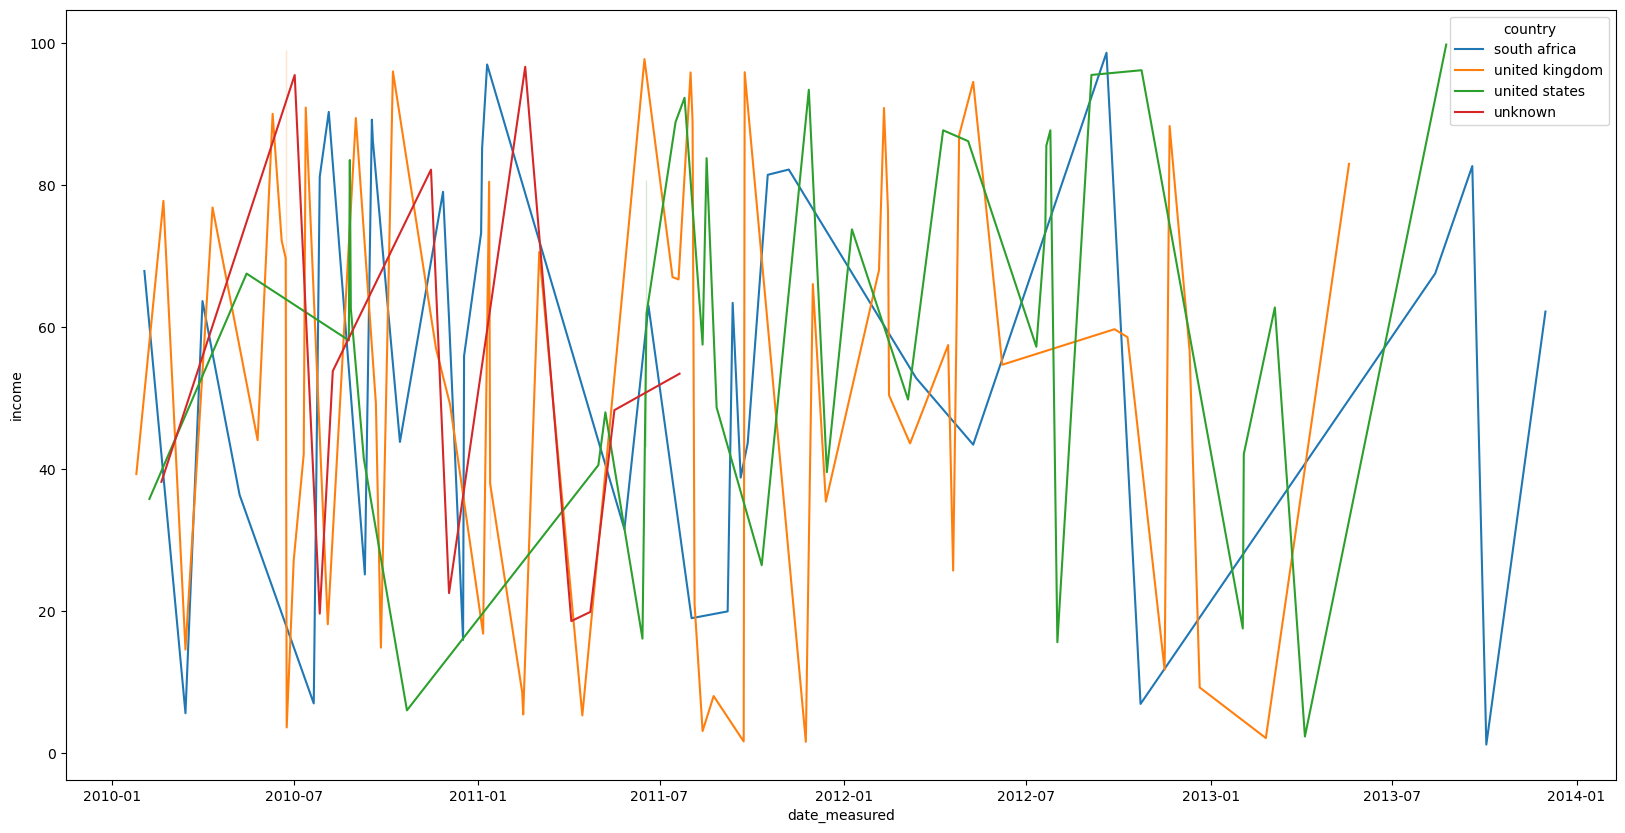

In [37]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_2010, x='date_measured', y='income', hue='country')
plt.show()